In [2]:
# venv: uacademia >>> 20250526

![](https://media.geeksforgeeks.org/wp-content/uploads/20240507122514/what-is-Outlier-Detection.webp)

# Análisis de datos
## ¿Qué es un Outlier o valor atípico?

Un valor atípico es un elemento/objeto de datos que se desvía significativamente del resto de los objetos (denominados normales). Identificar valores atípicos es importante en estadística y análisis de datos, ya que pueden tener un impacto significativo en los resultados de los análisis estadísticos.

## ¿Cómo se producen los valores atípicos?

Los valores atípicos pueden deberse a diversos factores y, a menudo, son resultado de una variabilidad real en los datos o de errores en la recopilación, medición o registro de datos. Algunas causas comunes de valores atípicos son:

- **Errores de medición**: Los errores en la recopilación de datos o en los procesos de medición pueden dar lugar a valores atípicos.
- **Errores de muestreo**: En algunos casos, pueden surgir valores atípicos debido a problemas con el proceso de muestreo.
- **Variabilidad natural**: La variabilidad inherente a ciertos fenómenos también puede dar lugar a valores atípicos. Algunos sistemas pueden presentar valores extremos debido a la naturaleza del proceso estudiado.
- **Errores de entrada de datos**: Los errores humanos durante la entrada de datos pueden introducir valores atípicos.
- **Errores experimentales**: En entornos experimentales, pueden ocurrir anomalías debido a factores no controlados, mal funcionamiento del equipo o eventos inesperados.
- **Muestreo de múltiples poblaciones**: Se combinan inadvertidamente datos de múltiples poblaciones con diferentes características.
- **Valores atípicos intencionales**: los valores atípicos se introducen intencionalmente para probar la solidez de los métodos estadísticos.


In [38]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Técnicas de detección de valores atípicos o outliers

### Visualización y eliminación de valores atípicos mediante un diagrama de caja

Capturar el resumen de los datos de forma eficaz y eficiente con un simple diagrama de caja (boxplot). El diagrama de caja resume los datos de muestra utilizando los percentiles 25, 50 y 75. Se puede obtener información detallada (cuartiles, mediana y valores atípicos) del conjunto de datos simplemente observando el diagrama de caja.

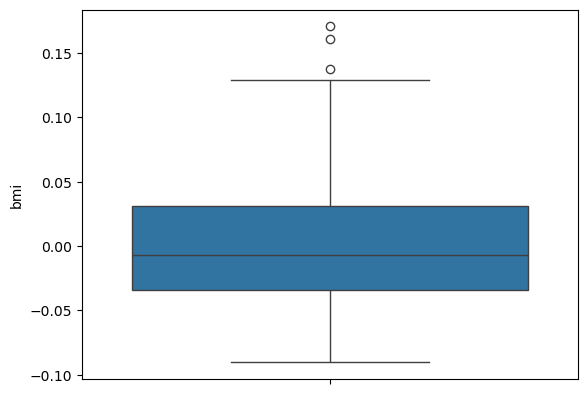

In [49]:
# Box Plot
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])
plt.show()

En el gráfico anterior, se puede ver claramente que los valores superiores a **0.12** actúan como valores atípicos.

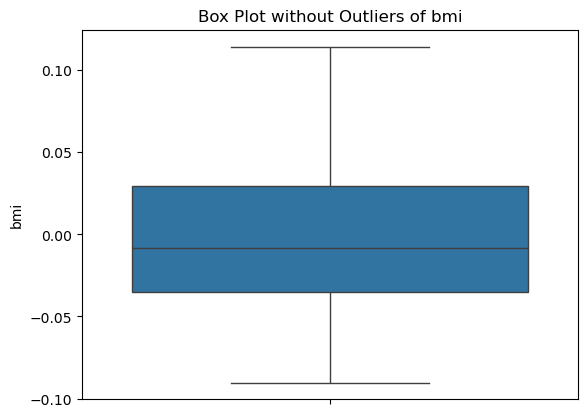

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


def removal_box_plot(df, column, threshold):
    #sns.boxplot(df[column])
    #plt.title(f'Original Box Plot of {column}')
    #plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 0.12

no_outliers = removal_box_plot(df_diabetics, 'bmi', threshold_value)

### Visualización y eliminación de valores atípicos mediante un diagrama de dispersión

Se utiliza cuando se tienen datos numéricos emparejados y la variable dependiente tiene múltiples valores para cada variable independiente de lectura, o cuando se intenta determinar la relación entre ambas variables. Al utilizar el diagrama de dispersión, también se puede utilizar para la detección de valores atípicos.

Para trazar el diagrama de dispersión, se requieren dos variables relacionadas entre sí. En este caso, se utilizan las variables «**bmi** body mass index of people» y «**bp** of the people».

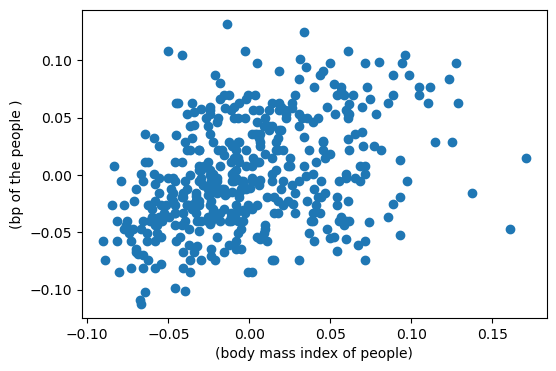

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_diabetics['bmi'], df_diabetics['bp'])
ax.set_xlabel('(body mass index of people)')
ax.set_ylabel('(bp of the people )')
plt.show()

Al observar el gráfico, se puede observar que la mayoría de los puntos de datos se encuentran en la esquina inferior izquierda, pero hay algunos puntos exactamente opuestos a la esquina superior derecha. Estos puntos en la esquina superior derecha pueden considerarse valores atípicos.

Mediante aproximación, se puede determinar que todos los puntos de datos con valores x > 0.12 e y < 0.8 son atípicos. El siguiente código permite obtener la posición exacta de todos los puntos que cumplen estas condiciones.

#### Eliminación de valores atípicos en las columnas de IMC y PA combinadas

Aquí, la función de NumPy **np.where()** se utiliza para encontrar las posiciones (índices) donde la condición 
```python
(df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8) 
```
se cumple en el DataFrame df_diabetics . La condición busca valores atípicos donde **bmi** sea mayor que **0.12** y **bp** menor que **0.8**. 

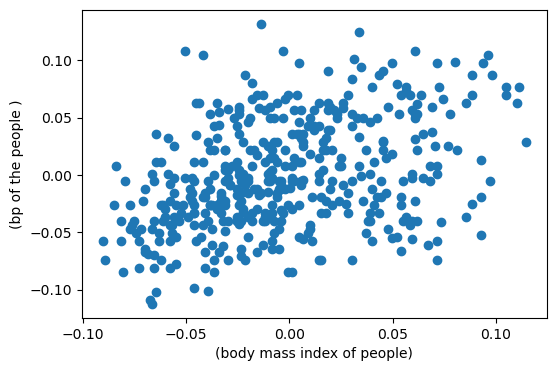

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

outlier_indices = np.where((df_diabetics['bmi'] > 0.12) & (df_diabetics['bp'] < 0.8))

no_outliers = df_diabetics.drop(outlier_indices[0])

# Scatter plot without outliers
fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('(body mass index of people)')
ax_no_outliers.set_ylabel('(bp of the people )')
plt.show()

### Z-Score

La puntuación Z también se denomina puntuación estándar. Este valor/puntuación ayuda a comprender la distancia entre los datos y la media. Tras establecer un valor umbral, se pueden utilizar los valores de la puntuación Z de los datos para definir los valores atípicos.

$$ ZScore = (punto de datos - media) / desviación estándar $$

En el ejemplo, se calcula las puntuaciones Z de la columna **edad** del DataFrame df_diabetics mediante la zscore función del módulo de estadísticas de SciPy. La matriz resultante z contiene las puntuaciones Z absolutas de cada punto de datos de la columna "edad", indicando cuántas desviaciones estándar se encuentran cada valor respecto a la media.

In [72]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_diabetics['age']))
print(z)

0      0.800500
1      0.039567
2      1.793307
3      1.872441
4      0.113172
         ...   
437    0.876870
438    0.115937
439    0.876870
440    0.956004
441    0.956004
Name: age, Length: 442, dtype: float64


#### Eliminación de valores atípicos con puntuación Z

En este ejemplo, se establece un valor de umbral de **2** y se utiliza NumPy **np.where()** para identificar las posiciones (índices) en la matriz de puntuaciones Z z donde la puntuación Z absoluta es mayor que el umbral especificado (2). Se imprimen las posiciones de los valores atípicos en la columna **edad** según el criterio de puntuación Z.

In [77]:
import numpy as np

threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
no_outliers = df_diabetics.drop(outlier_indices)
print("DataFrame Original Shape:", df_diabetics.shape)
print("DataFrame despues de Remover Outliers:", no_outliers.shape)

DataFrame Original Shape: (442, 10)
DataFrame despues de Remover Outliers: (426, 10)


### IQR (rango intercuartilico)

La tecnica de rango intercuartilico para encontrar valores atípicos es el enfoque más comúnmente utilizado y más confiable en el campo de la investigación.

$$IQR = Q3 - Q1$$

Para el siguiente ejemplo, calculamos el rango intercuartilico (IQR) de la columna **IMC** del DataFrame df_diabetics. Primero, se calcula el primer cuartil (**Q1**) y el tercer cuartil (**Q3**) mediante el método del punto medio. A continuación, se calcula el IQR como la diferencia entre Q3 y Q1, lo que proporciona una medida de la dispersión del 50% central de los datos en la columna "IMC".

In [85]:
# IQR
Q1 = np.percentile(df_diabetics['bmi'], 25, method='midpoint')
Q3 = np.percentile(df_diabetics['bmi'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

0.06520763046978838


In [99]:
df_diabetics['bmi'].describe()

count    4.420000e+02
mean    -2.255925e-16
std      4.761905e-02
min     -9.027530e-02
25%     -3.422907e-02
50%     -7.283766e-03
75%      3.124802e-02
max      1.705552e-01
Name: bmi, dtype: float64

Para definir el valor base atípico se define por encima y por debajo del rango normal del conjunto de datos, es decir, los límites superior e inferior, se considera un valor de $1.5 * IQR$

$$ limite superior = Q3 + 1.5 * IQR $$

$$ limite inferior = Q1 - 1.5 *IQR $$

               

In [122]:
# Above Upper bound
upper = Q3+1.5*IQR
upper_array = np.array(df_diabetics['bmi'] >= upper)
print("Limite Superior:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df_diabetics['bmi'] <= lower)
print("limite inferior:", lower)
print(lower_array.sum())

Limite Superior: 0.12879000811776306
3
limite inferior: -0.13204051376139045
0


#### Eliminación de valores atípicos en un conjunto de datos mediante IQR

Para el ejemplo, se utilizara el método IQR para detectar y eliminar valores atípicos en la columna **IMC** del conjunto de datos de diabetes. Este método calcula los límites superior e inferior según el IQR, identifica los valores atípicos mediante matrices booleanas y, a continuación, elimina las filas correspondientes del DataFrame, lo que genera un nuevo DataFrame con los valores atípicos excluidos. Las formas del DataFrame, antes y después, se imprimen para su comparación.

In [127]:
# Importing
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Create the dataframe
column_name = diabetes.feature_names
df_diabetes = pd.DataFrame(diabetes.data)
df_diabetes .columns = column_name
df_diabetes .head()
print("Tamaño dataframe original: ", df_diabetes.shape)

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = df_diabetes['bmi'].quantile(0.25)
Q3 = df_diabetes['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df_diabetes['bmi'] >= upper)[0]
lower_array = np.where(df_diabetes['bmi'] <= lower)[0]

# Removing the outliers
df_diabetes.drop(index=upper_array, inplace=True)
df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
print("Tamaño dataframe sin Outliers: ", df_diabetes.shape)

Tamaño dataframe original:  (442, 10)
Tamaño dataframe sin Outliers:  (439, 10)


## Prácticas para el manejo de outliers

1. **Conocimiento**: Entender el tema y el contexto de los datos. A veces, los valores atípicos pueden ser puntos de datos válidos que requieren atención especial.

2. **Técnica**: Seleccionar la técnica de detección de valores atípicos que se alinea con sus objetivos y análisis. **Z-score** podría funcionar bien para datos normalmente distribuidos, mientras que **IQR** es robusto para distribuciones sesgadas.

3. **Transparencia**: Si se decide eliminar o modificar los valores atípicos, sea transparente en la presentación del informe, acerca de las acciones tomadas y el impacto en los resultados.

# $$ limite superior = Q3 + 1.5 * IQR $$